In [19]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
fPAR=nc.Dataset('/results2/SalishSea/nowcast-green.201905/01apr16/SalishSea_1h_20160401_20160401_carp_T.nc')

In [21]:
fPAR.variables.keys()

odict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'PAR', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'sigma_theta', 'e3t', 'Fraser_tracer', 'dissolved_inorganic_carbon', 'total_alkalinity', 'dissolved_oxygen'])

In [22]:
fk=nc.Dataset('/results2/SalishSea/nowcast-green.201905/01apr16/SalishSea_1h_20160401_20160401_grid_W.nc')

In [23]:
fk.variables.keys()

odict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'depthw', 'depthw_bounds', 'vovecrtz', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'vert_eddy_diff', 'vert_eddy_visc', 'dissipation'])

In [24]:
#fk.close()

In [25]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    navlon=mesh.variables['nav_lon'][:,:]
    navlat=mesh.variables['nav_lat'][:,:]
    tmask=mesh.variables['tmask'][0,:,:,:]
    z=mesh.variables['gdept_1d'][0,:]
    zw=mesh.variables['gdepw_1d'][0,:]

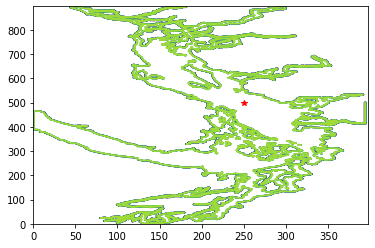

In [26]:
ii=250
jj=500
plt.contour(tmask[0,:,:])
plt.plot(ii,jj,'r*')

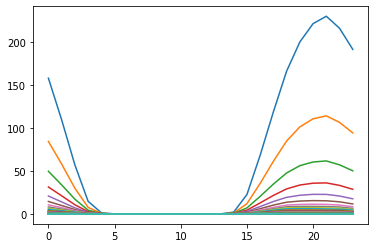

In [27]:
plt.plot(fPAR.variables['PAR'][:,:,jj,ii]); # not land!

In [28]:
dailyPAR=np.mean(fPAR.variables['PAR'][:,:,jj,ii],0)

In [29]:
np.shape(dailyPAR)

(40,)

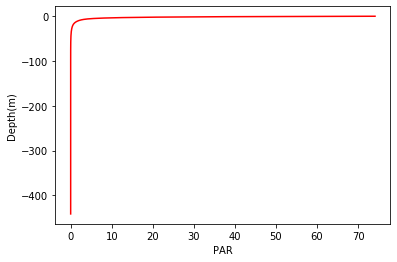

In [30]:
plt.plot(dailyPAR,-1*z,'r-')
plt.xlabel('PAR');
plt.ylabel('Depth(m)');

In [31]:
LL=0.1 # choose 10% light level

In [32]:
xx=dailyPAR>LL*dailyPAR[0]

In [33]:
xx

masked_array(data=[ True,  True,  True,  True,  True, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False],
             mask=False,
       fill_value=True)

In [34]:
# want the w-index between the last true value and the first false value:
# w0 T0 w1 T1 w2 T2
#    T      T    F
# in case above, correct index would be 2: sum of Trues
kk=np.sum(xx)
print(kk)

5


In [35]:
print(fk)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    name: SalishSea_1h_20160401_20160405
    description: ocean W grid variables
    title: ocean W grid variables
    Conventions: CF-1.6
    timeStamp: 2019-Sep-27 21:09:37 GMT
    uuid: 917272c7-b5e4-4252-84b9-ebefa70ca378
    dimensions(sizes): axis_nbounds(2), x(398), y(898), nvertex(4), depthw(40), time_counter(24)
    variables(dimensions): float32 nav_lat(y,x), float32 nav_lon(y,x), float32 bounds_lon(y,x,nvertex), float32 bounds_lat(y,x,nvertex), float32 area(y,x), float32 depthw(depthw), float32 depthw_bounds(depthw,axis_nbounds), float32 vovecrtz(time_counter,depthw,y,x), float64 time_centered(time_counter), float64 time_centered_bounds(time_counter,axis_nbounds), float64 time_counter(time_counter), float64 time_counter_bounds(time_counter,axis_nbounds), float32 vert_eddy_diff(time_counter,depthw,y,x), float32 vert_eddy_visc(time_counter,depthw,y,x), float32 dissipation(time_counter,depthw,

In [76]:
kprof=np.mean(fk.variables['vert_eddy_diff'][:,:,jj,ii],0)

print(np.max(fk.variables['vert_eddy_diff'][:,:,jj,ii],0))

[0.00000000e+00 5.32184541e-03 7.56764894e-06 6.50489392e-06
 7.85756129e-06 5.16997976e-03 7.41298718e-04 1.06007338e-03
 7.28430576e-04 4.56404639e-04 1.46063758e-06 9.99999997e-07
 1.00029251e-06 2.11845418e-06 2.11176266e-05 1.15907903e-06
 1.22995380e-06 1.04155086e-04 9.99999997e-07 9.99999997e-07
 1.06779714e-06 1.00055695e-06 2.70596615e-06 1.73238800e-06
 3.13786404e-06 4.45727392e-06 2.18320679e-06 1.93191295e-06
 1.79638425e-06 1.65183258e-06 2.01026728e-06 2.38459484e-06
 7.71510706e-04 3.78488600e-01 1.20747264e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


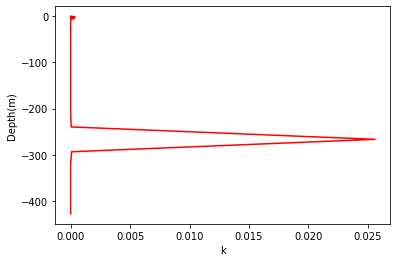

In [37]:
plt.plot(kprof,-1*zw,'r-')
plt.xlabel('k');
plt.ylabel('Depth(m)');

In [38]:
kprof[5]

0.0003141591

In [39]:
def getVEDEuph(ii,jj,LL,fileK,filePAR):
    dailyPAR=np.mean(fPAR.variables['PAR'][:,:,jj,ii],0)
    kk=np.sum(dailyPAR>LL*dailyPAR[0])
    kprof=np.mean(fk.variables['vert_eddy_diff'][:,:,jj,ii],0)
    return kprof[kk]

In [40]:
getVEDEuph(ii,jj,LL,fk,fPAR)

0.0003141591

## clustering VEDEuph

In [78]:
import sys
sys.path.append('./KEY_PAPERFIGURES/extraction_scripts/')
import arrow
import xarray as xr
import numpy as np
import glob
import netCDF4 as nc
import map_fxn as mf

bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
############oma eq###############


str_to_W = '/data/tjarniko/avg/*'
run_name = 'BR3'
stn_b = 0
stn_e = 580

start ='2013-01-01'
end ='2013-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array1 = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array1.append(r)
dayslen = len(arrow_array1)

gridW = []
for i in range(0,dayslen):

    tdate = arrow_array1[i][0]
    ymd = tdate.format('YYYYMMDD')
    tstr = glob.glob(str_to_W +ymd+'*grid_W.nc')
    #print(tstr)
    gridW.append(tstr[0])    

carpT = []
str_to_C = '/results2/SalishSea/hindcast.201905/*/*'
for i in range(0,dayslen):

    tdate = arrow_array1[i][0]
    ymd = tdate.format('YYYYMMDD')
    tstr = (str_to_C+ymd+'*carp_T.nc')#'*carp_T.nc'
    #print(tstr)
    tstr = glob.glob(str_to_C +ymd+'*carp_T.nc')
    #print(tstr)
    #print(tstr)
    carpT.append(tstr[0])       
    
bath = '/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc'
grid = mf.import_bathy(bath)
fmask = (grid.fmask[0,0,:,:])
spacing = 10
stn_x, stn_y = mf.make_stns(spacing)
d_stn_x, d_stn_y = mf.filter_stn_in_domain(stn_x,stn_y,fmask)  
print('complete')

complete


In [79]:
import sys
sys.path.append('./KEY_PAPERFIGURES/extraction_scripts/')
import arrow
import xarray as xr
import numpy as np
import glob
import netCDF4 as nc
import map_fxn as mf

bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
############oma eq###############


str_to_W = '/data/tjarniko/avg/*'
run_name = 'BR3'
stn_b = 0
stn_e = 100

start ='2013-01-01'
end ='2013-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array1 = []

for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array1.append(r)
dayslen = len(arrow_array1)

gridW = []
for i in range(0,dayslen):

    tdate = arrow_array1[i][0]
    ymd = tdate.format('YYYYMMDD')
    tstr = glob.glob(str_to_W +ymd+'*grid_W.nc')
    #print(tstr)
    gridW.append(tstr[0])    

carpT = []
str_to_C = '/results2/SalishSea/hindcast.201905/*/*'
for i in range(0,dayslen):

    tdate = arrow_array1[i][0]
    ymd = tdate.format('YYYYMMDD')
    tstr = (str_to_C+ymd+'*carp_T.nc')#'*carp_T.nc'
    #print(tstr)
    tstr = glob.glob(str_to_C +ymd+'*carp_T.nc')
    #print(tstr)
    #print(tstr)
    carpT.append(tstr[0])       
    
bath = '/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc'
grid = mf.import_bathy(bath)
fmask = (grid.fmask[0,0,:,:])
spacing = 10
stn_x, stn_y = mf.make_stns(spacing)
d_stn_x, d_stn_y = mf.filter_stn_in_domain(stn_x,stn_y,fmask)  
print('complete')

year = '2013'
LL=0.1 

def getVEDEuph(ii,jj,LL,fileK,filePAR):
    #print(filePAR)
#     print(ii)
#     print(jj)
    dailyPAR=np.mean(filePAR.variables['PAR'][:,:,jj,ii],0)
    kk=np.sum(dailyPAR>LL*dailyPAR[0])
    #print(fileK)
    kprof=(fileK.variables['vert_eddy_diff'][:,:,jj,ii])
    #print(kprof)
    new_kprof = kprof[0,:]
    return new_kprof[kk]


for stn in range(stn_b,stn_e):

    print('station is: ' ,str(stn))
    print('x is :', d_stn_x[stn])
    print('y is :', d_stn_y[stn])

    ts_x = d_stn_x[stn]
    ts_y = d_stn_y[stn]

    daily_omahor = np.zeros(len(dayar))

    for day in range(0,len(dayar)):

        carp = nc.Dataset(carpT[day])
        W = nc.Dataset(gridW[day])
        #print(gridW[day])
        vedeuph = getVEDEuph(ts_x,ts_y,LL,W,carp)
        if day%5 == 0:
            print(day)
            print(vedeuph)
        daily_omahor[day] = vedeuph
        #print(toma)

        ved = xr.Dataset({'daily_ved':(['t'], daily_omahor)})
        stn_name = '/data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/NC_HINDCAST/'\
        + str(year) + '/VED_TS/stn_' + str(stn)  + 'FOTOVED_sp' + str(spacing)+ '.nc'
        ved.to_netcdf(stn_name)
        

station is:  0
x is : 2
y is : 392
0
16.864399
5
10.022744
10
0.89229214
15
0.00037522198
20
0.016813362
25
0.0016440975
30
7.843275e-06
35
5.767046e-06


KeyboardInterrupt: 

In [75]:
w = nc.Dataset('/results2/SalishSea/hindcast.201905/01jan13/SalishSea_1h_20130101_20130101_grid_W.nc')
print(w['vert_eddy_diff'][:,:,392,2])
print(np.mean(w.variables['vert_eddy_diff'][:,:,392,2],0))

[[0.00000000e+00 1.47523433e-01 1.74854308e-01 2.13716403e-01
  2.30203643e-01 2.69414723e-01 2.29830608e-01 2.92406231e-01
  2.75350600e-01 2.98511833e-01 2.00610146e-01 3.26675624e-01
  2.56250232e-01 3.41529906e-01 3.61475050e-01 3.27219099e-01
  4.07643557e-01 3.66431713e-01 4.06459093e-01 3.40106875e-01
  5.64729273e-01 3.73657107e-01 3.46713811e-01 1.81034729e-01
  3.74432057e-02 1.85890719e-02 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.73311090e+00 8.12190819e+00 6.61463070e+00
  6.68063116e+00 8.04420662e+00 7.33784676e+00 9.62922478e+00
  9.57532883e+00 9.50147057e+00 7.40051270e+00 9.33709240e+00
  8.04820538e+00 8.99595070e+00 9.01269531e+00 8.15564346e+00
  8.97796726e+00 8.01197910e+00 8.13564873e+00 6.35034609e+00
  9.19839191e+00 5.54389620e+00 6.75502348e+00 6.22555256e+00
  4.494

[ 0.        13.729592  18.627254  15.550991  16.767237  21.613272
 15.190129  21.231749  22.05192   22.463099  19.178518  22.022972
 20.24026   20.34612   21.365408  16.864397  21.468256  20.252256
 19.058321  17.399805  20.92687   13.2186365 16.779366  15.66046
 11.757306   5.8229337  0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.       ]
